# 분류
  - 특성 - feature로 묶음
  - k 최근접 이웃

# 혼공 분류

In [46]:
# 데이터 가져오기
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

# 데이터 합치기
length = bream_length + smelt_length
weight = bream_weight + smelt_length

# 정답
fish_target = [1]*35 + [0]*14

fish_data = list(zip(length, weight))
# fish_data, fish_target

In [47]:
# 학습
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)
kn.score(fish_data, fish_target)

1.0

In [48]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |
 |  Classifier implementing the k-nearest neighbors vote.
 |
 |  Read more in the :ref:`User Guide <classification>`.
 |
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of a q

In [49]:
# 예측
kn.predict([[30,600]]) # 2차원 데이터

array([1])

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.DataFrame(fish_data,columns=['length','weight'])
df['target'] = fish_target
df.head()

,length,weight,target
0,25.4,242.0,1
1,26.3,290.0,1
2,26.5,340.0,1
3,29.0,363.0,1
4,29.0,430.0,1


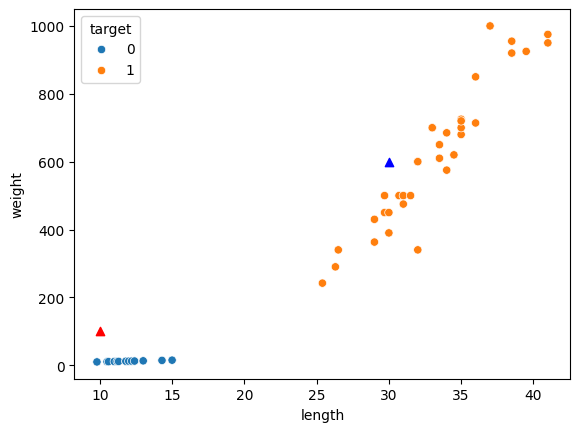

In [51]:
sns.scatterplot(data=df, x='length', y='weight', hue='target')
plt.scatter(x=30,y=600,color='blue', marker='^')
plt.scatter(x=10,y=100,color='red', marker='^')

In [52]:
kn.predict([[30, 600],[10,100]]) # 데이터 학습할 때의 모양으로 넣어줌

array([1, 0])

In [53]:
# 파라미터의 n_neighbor의 값에 따른 성능변화
# n_neighbor의 개수를 전체 데이터로 한다면?
kn49 = KNeighborsClassifier(n_neighbors=49)
kn49.fit(fish_data, fish_target)
# 성능
print(kn49.score(fish_data,fish_target))
print(f'전체데이터 중에 35개만 맞출 확률 : {35/49}')
print(f'전체데이터를 예측데이터로 넣으면 모델이 예측한 정답은 : {kn49.predict(fish_data)}')
print('무조건 클래스 1만 예측했음')

0.7142857142857143
전체데이터 중에 35개만 맞출 확률 : 0.7142857142857143
전체데이터를 예측데이터로 넣으면 모델이 예측한 정답은 : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]
무조건 클래스 1만 예측했음


### 올바른 데이터 분류

In [54]:
# 현재 주어진 데이터는 처음부터 35개는 클래스 1이고, 나머지 14개는 0의 데이터
x_train = fish_data[:35]
x_test = fish_data[35:]
y_train = fish_target[:35]
y_test = fish_target[35:]

In [55]:
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
kn.score(x_test,y_test) # 학습데이터에는 클래스 0에 대한 학습데이터가 없다

0.0

In [56]:
# 데이터를 섞는다...
# 골고루 -> 올바른 비율
# 샘플링 편향 문제 - 개수가 다름
# target의 비율대로 섞어준다...
# target의 비율이 다른 현상을 샘플링 편향

In [57]:
import random
temp = list(zip(fish_data,fish_target))
random.shuffle(temp)
data, target = [], []
for a,b in temp:
    data.append(a)
    target.append(b)
x_train = data[:35]
y_train = target[:35]
x_test = data[35:]
y_test = target[35:]

In [58]:
# 데이터를 섞고 난 후 학습
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
kn.score(x_test,y_test)

1.0

In [59]:
# 샘플링 편향
pd.DataFrame(fish_target).value_counts()

0
1    35
0    14
Name: count, dtype: int64

In [60]:
# 넘파이
import numpy as np
fish_target_np = np.array(fish_target)
fish_target_np

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [61]:
# 넘파이를 이용해 데이터 섞기 - 인덱스 이용
a = [1,2,3,4,5]
a = np.array(a)
a[[1,3]]

array([2, 4])

In [62]:
# fish_data_np = np.array(fish_data)
# fish_target_np = np.array(fish_target)
# indexes = list(range(len(fish_data)))
# np.random.shuffle(indexes)

In [63]:
indexes = list(range(len(fish_data))) # 0 ~ 48 순차 인덱스
random.shuffle(indexes) # 인덱스 자체를 섞음
indexes
# 섞인 인덱스의 :35까지의 인덱스에 해당하는 일부 데이터를 추출 --> 넘파이만 가능
x_train, y_train = np.array(fish_data)[indexes[:35]], np.array(fish_target)[indexes[:35]]
x_test, y_test = np.array(fish_data)[indexes[35:]], np.array(fish_target)[indexes[35:]]

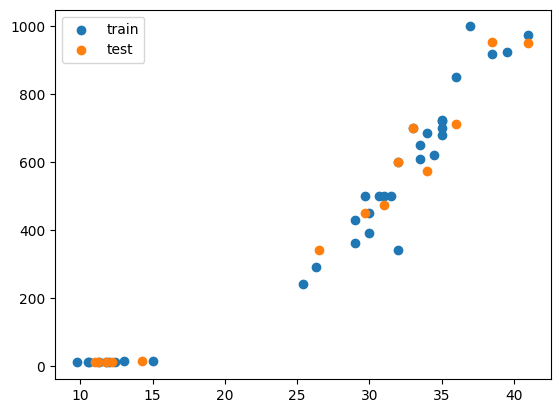

In [64]:
# 시각화를 통해 잘 섞여있는지 확인
plt.scatter(x_train[:,0],x_train[:,1],label = 'train')
plt.scatter(x_test[:,0],x_test[:,1], label = 'test')
plt.legend()
plt.show()

In [65]:
# 데이터는 샘플링 편향 없이 클래스들이 잘 섞여서 학습을 해야 여러 특성을 골고루 반영한다
# 데이터를 섞는 이유

In [66]:
# 데이터 --> 넘파이
fish_data = np.array(fish_data)
fish_target = np.array(fish_target)
fish_data, fish_target

(array([[  25.4,  242. ],
        [  26.3,  290. ],
        [  26.5,  340. ],
        [  29. ,  363. ],
        [  29. ,  430. ],
        [  29.7,  450. ],
        [  29.7,  500. ],
        [  30. ,  390. ],
        [  30. ,  450. ],
        [  30.7,  500. ],
        [  31. ,  475. ],
        [  31. ,  500. ],
        [  31.5,  500. ],
        [  32. ,  340. ],
        [  32. ,  600. ],
        [  32. ,  600. ],
        [  33. ,  700. ],
        [  33. ,  700. ],
        [  33.5,  610. ],
        [  33.5,  650. ],
        [  34. ,  575. ],
        [  34. ,  685. ],
        [  34.5,  620. ],
        [  35. ,  680. ],
        [  35. ,  700. ],
        [  35. ,  725. ],
        [  35. ,  720. ],
        [  36. ,  714. ],
        [  36. ,  850. ],
        [  37. , 1000. ],
        [  38.5,  920. ],
        [  38.5,  955. ],
        [  39.5,  925. ],
        [  41. ,  975. ],
        [  41. ,  950. ],
        [   9.8,    9.8],
        [  10.5,   10.5],
        [  10.6,   10.6],
        [  1

In [67]:
from sklearn.model_selection import train_test_split

In [106]:
x_train,x_test,y_train,y_test = train_test_split(fish_data, fish_target, test_size=0.2, stratify=fish_target)

In [69]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)
model.score(x_test, y_test)

1.0

In [70]:
distance, index = model.kneighbors([[25, 150]]) # 근처 가장 가까운 인덱스
x_train[index][0]

array([[ 25.4, 242. ],
       [ 15. ,  15. ],
       [ 13. ,  13. ],
       [ 12.4,  12.4],
       [ 12.2,  12.2]])

array([0])

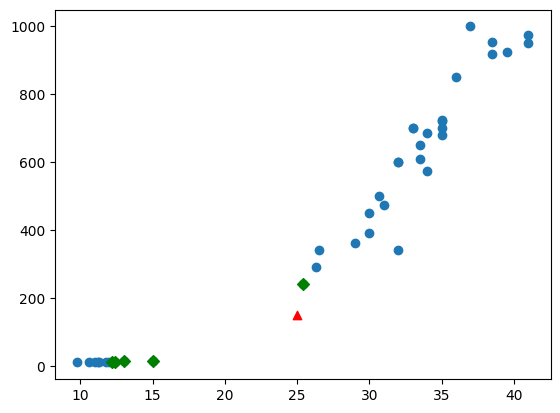

In [71]:
# (25,150) --> 클래스? 0? 1?
plt.scatter(x=x_train[:,0],y=x_train[:,1])
plt.scatter(x=25,y=150,marker='^',c='red')
# 이웃한 5개의 실제 데이터
plt.scatter(x=x_train[index][0][:,0],y=x_train[index][0][:,1],marker='D',c='green')
model.predict([[25,150]])

In [72]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler

In [108]:
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train) # fit과 transform
x_test_scaled = ss.transform(x_test) # 같은 형식으로, transform만
model = KNeighborsClassifier()
model.fit(x_train_scaled, y_train)
model.score(x_test_scaled, y_test)
new = ([25,150]-np.mean(x_train))/np.std(x_train)
sample = np.array([new])
model.predict(sample)

array([1])

In [109]:
distance, index = model.kneighbors(sample)
index

array([[17, 25, 13, 11,  5]])

array([1])

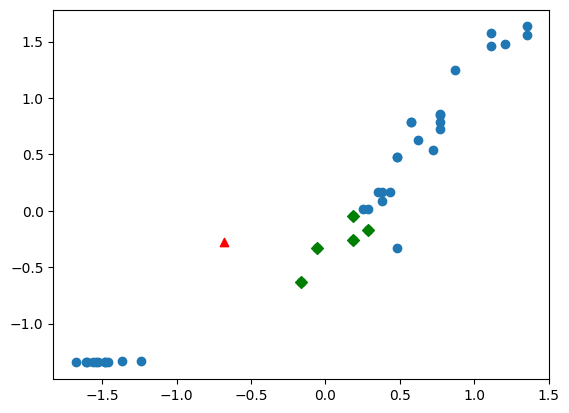

In [113]:
# 시각화를 통해 확인
plt.scatter(x =x_train_scaled[:,0], y=x_train_scaled[:,1])
plt.scatter(x=new[0],y=new[1], marker='^',c='red')
# # 이웃한 5개의 실제 데이터
plt.scatter(x_train_scaled[index][0][:,0],x_train_scaled[index][0][:,1],marker='D',c='green')
model.predict([new])

In [76]:
# 전체에 대한 맞춘 확률보다 얼마나 맞추었는지가 중요함
# 분류 모델을 평가하는 지표
# confusion matrix - 이진분류
# 예측값 T - TP, FP
# 예측값 F - FN, TN
# 정확도(precision) TP/(TP + FP) : 참으로 고른 것 중 맞춘 것
# 재현율(recall) TP/(TP + FN) : 실제 True 중 맞춘 것
# F1지표(F1-score)

In [77]:
# titanic 데이터 가져오기
# 전처리
    # 결측치, 이상치, 피쳐엔지니어링(적합한 feature 선택), 표준화
# 모델 선택 KNN
# 학습
# 평가 confusion matrix

In [78]:
titanic = sns.load_dataset('titanic')
model = KNeighborsClassifier()
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [79]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [80]:
drop_cols = ['class','who','alive','alone','embark_town','deck','fare']
df = titanic.drop(columns=drop_cols)
df.head()

,survived,pclass,sex,age,sibsp,parch,embarked,adult_male
0,0,3,male,22.0,1,0,S,True
1,1,1,female,38.0,1,0,C,False
2,1,3,female,26.0,0,0,S,False
3,1,1,female,35.0,1,0,S,False
4,0,3,male,35.0,0,0,S,True


In [81]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['embarked'] = le.fit_transform(df['embarked'])
df['adult_name'] = le.fit_transform(df['adult_male'])
df.isna().sum()
# 나이에 대한 결측치는 선실 등급별 성별 평균으로 fillna
grouped = df.groupby(['pclass','sex'])
grouped['age'].transform('mean')
df['age'] = df['age'].fillna(grouped['age'].transform('mean'))

df.isna().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
embarked      0
adult_male    0
adult_name    0
dtype: int64

In [82]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = df.drop(columns='survived')
y = df['survived']
X_scaled = ss.fit_transform(X)
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,stratify=y, random_state=42)

In [83]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [84]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, model.predict(x_test))

array([[119,  18],
       [ 30,  56]])

In [85]:
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       137
           1       0.76      0.65      0.70        86

    accuracy                           0.78       223
   macro avg       0.78      0.76      0.77       223
weighted avg       0.78      0.78      0.78       223



In [86]:
# 성능 개선 - one hot
drop_cols = ['class','who','alive','alone','embark_town','deck','fare']
df = titanic.drop(columns=drop_cols)
df.head()
# pclas 1 2 3 --> 3:0 2:1 1:2
# embarked : 순서가 있는 라벨링 or onehot
# adult_male, alone : 라벨인코딩 (이진분류)
def imsi(x):
    if x == 3:
        return 0
    elif x == 2:
        return 1
    elif x == 1:
        return 2
    
le = LabelEncoder()
df['pclass'] = df['pclass'].apply(imsi)
df['adult_male'] = le.fit_transform(df['adult_male'])
df['sex'] = le.fit_transform(df['sex'])
df['embarked'] = df['embarked'].fillna('S')
df['embarked'] = le.fit_transform(df['embarked'])
df['age'] = df['age'].fillna(df['age'].mean())

df.isna().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
embarked      0
adult_male    0
dtype: int64

In [87]:
dummy_embarked = pd.get_dummies(df['embarked'],prefix='embarked').astype(int)
pd.concat( [df.drop(columns='embarked'),dummy_embarked],axis=1)
X = df.drop(columns='survived')
y = df['survived']
X_scaled = ss.fit_transform(X)
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,stratify=y, random_state=42)
model = KNeighborsClassifier()
model.fit(x_train,y_train)
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       137
           1       0.76      0.66      0.71        86

    accuracy                           0.79       223
   macro avg       0.78      0.77      0.77       223
weighted avg       0.79      0.79      0.79       223



In [88]:
df = sns.load_dataset('titanic')
df['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

## 로지스틱 회귀

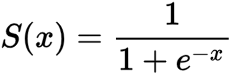

In [89]:
# 계단 함수
    # 입력 데이터를 0과 1로만 출력
    # --> 미분이 가능한 형태로 만들기 위해서 시그모이드
# 시그모이드 함수
    # 선형회귀 출력값을 0 ~ 1 사이로 변경 --> 확률로 해석
    # x는 y = wx + b (w 는 가중치)
    # 클래스 1에 속할 확률이 p(x) = 0.8 -> 나머지 0.2
    # 임계치가 존재... 임계치 이상이면 1 아니면 0 보통은 0.5
# 손실함수(로그손실) --> ex) y = x^2
    # Log loss, cross entropy
    # 실제 값과 예측 값의 차이를 나타내는 함수 --> 차이를 최소화 하는 방향으로 학습
    # 경사 하강법 - 최적화 : 손실함수의 값이 최소가 되는 방향을 찾아서 원래 가중치를 갱신
    # y = w1x1 + w2x2, 미분하여 변화
# 학습 횟수 (epoch)
    # 에포크 : 전체 데이터를 한번 사용해서 학습
# 학습률 (learning rate)
    # 한번에 경사를 내려가는 보폭의 크기
    # 작으면 달성 못함, 크면 발산
    # 처음 크게 나중 작게 --> optimizer

In [90]:
# 시그모이드 함수
def sigmoid(x):
    return 1/(1 + np.exp(-x))
# 이진분류 데이터 생성
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=100, n_features=4,n_classes=2,random_state=42) # 샘플 100개의 2진분류
print(X.shape, y.shape)
# (y == 0).sum() # 데이터 반반씩
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)

from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression(); model_knn = KNeighborsClassifier()
model_logistic.fit(x_train,y_train); model_knn.fit(x_train,y_train)

model_logistic.score(x_test,y_test), model_knn.score(x_test,y_test)

(100, 4) (100,)


(0.96, 0.96)

In [91]:
help(make_classification)

Help on function make_classification in module sklearn.datasets._samples_generator:

make_classification(n_samples=100, n_features=20, *, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)
    Generate a random n-class classification problem.

    This initially creates clusters of points normally distributed (std=1)
    about vertices of an ``n_informative``-dimensional hypercube with sides of
    length ``2*class_sep`` and assigns an equal number of clusters to each
    class. It introduces interdependence between these features and adds
    various types of further noise to the data.

    Without shuffling, ``X`` horizontally stacks features in the following
    order: the primary ``n_informative`` features, followed by ``n_redundant``
    linear combinations of the informative features, followed by ``n_repeated``
    duplicates, drawn rand

In [92]:
np.round(model_logistic.predict_proba(x_test),2) # 0일 확률과 1일 확률
# model_logistic.predict(x_test)

array([[0.03, 0.97],
       [0.02, 0.98],
       [0.  , 1.  ],
       [0.96, 0.04],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.98, 0.02],
       [0.02, 0.98],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.98, 0.02],
       [0.03, 0.97],
       [1.  , 0.  ],
       [0.95, 0.05],
       [0.01, 0.99],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.6 , 0.4 ],
       [0.99, 0.01],
       [0.8 , 0.2 ],
       [0.99, 0.01],
       [0.88, 0.12],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.06, 0.94]])

### 타이타닉 성능개선 모델의 데이터를 LogisticRegression에 적용

In [93]:
model_logistic = LogisticRegression()
model.fit(x_train,y_train)
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.92      0.96        12

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25



In [94]:
# 이진분류는 sigmoid
# 다중분류는 softmax 사용
# KNN, 로지스틱 회귀

In [95]:
# 적용
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [96]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
model_knn = KNeighborsClassifier()
# le = LabelEncoder()
# iris['species'] = le.fit_transform(iris['species'])
iris.head()
model_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [97]:
from sklearn.preprocessing import StandardScaler
X = iris.drop(columns=['species'])
y = iris['species']
# ss = StandardScaler()
# x_scaled = ss.fit_transform(X)
# x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,stratify=y,random_state=42)
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)

model_knn.fit(x_train,y_train)
print(classification_report(y_test,model_knn.predict(x_test)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.92      0.96        13

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [98]:
# 로지스틱 회귀
def sigmoid(x):
    return 1/(1 + np.exp(-x))

from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(x_train,y_train)
model_logistic.score(x_test,y_test)
print(classification_report(y_test,model_logistic.predict(x_test)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.92      0.92      0.92        13
   virginica       0.92      0.92      0.92        13

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



In [99]:
np.round(model_logistic.predict_proba(x_test),2)

array([[0.99, 0.01, 0.  ],
       [0.01, 0.66, 0.33],
       [0.03, 0.92, 0.05],
       [0.02, 0.93, 0.04],
       [0.98, 0.02, 0.  ],
       [0.01, 0.74, 0.25],
       [0.  , 0.24, 0.76],
       [0.  , 0.12, 0.88],
       [0.  , 0.03, 0.97],
       [0.  , 0.04, 0.96],
       [0.01, 0.61, 0.38],
       [0.  , 0.03, 0.97],
       [0.03, 0.95, 0.02],
       [0.02, 0.75, 0.24],
       [0.95, 0.05, 0.  ],
       [0.97, 0.03, 0.  ],
       [0.94, 0.06, 0.  ],
       [0.  , 0.76, 0.24],
       [0.98, 0.02, 0.  ],
       [0.02, 0.91, 0.07],
       [0.  , 0.17, 0.83],
       [0.15, 0.85, 0.  ],
       [0.  , 0.45, 0.55],
       [0.01, 0.81, 0.18],
       [0.  , 0.14, 0.86],
       [0.18, 0.82, 0.  ],
       [0.95, 0.05, 0.  ],
       [0.  , 0.4 , 0.6 ],
       [0.97, 0.03, 0.  ],
       [0.  , 0.45, 0.55],
       [0.  , 0.08, 0.92],
       [0.  , 0.03, 0.97],
       [0.99, 0.01, 0.  ],
       [0.97, 0.03, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.95, 0.05, 0.  ],
       [0.  , 0.05, 0.95],
 

Cardiovascular Disease dataset

In [100]:
cardio = pd.read_csv('C:\\Github\\python_study\\Pandas\\cardio_train.csv',sep=';')
cardio

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Github\\python_study\\Pandas\\cardio_train.csv'

In [125]:
# 탐색적 데이터 분석
    # 주로 시각화를 통해 데이터의 분포 형태 모양
# 데이터를 전처리
# 피쳐 엔지니어링(적합한 피처 선택(논리적/도메인지식) or 파생피처 생성(도메인지식))
# 모델선택
# 학습
# 평가
# 모델 채택

In [126]:
# ▪ 나이 (days)
# ▪ 성별(1-women, 2-men)
# ▪ 키(cm)
# ▪ 몸무게(kg)
# ▪ ap_hi(systolic blood pressure, 수축혈압)
# ▪ ap_lo(diastolic blood pressure, 이완혈압)
# ▪ cholesterol(1-normal, 2-above normal, 3-well above normal)
# ▪ gluc(혈당)(1-normal, 2-above normal, 3-well above normal)
# ▪ smoke(0-비흡연, 1-흡연)
# ▪ alco(0-음주X, 1-음주O)
# ▪ active(운동여부)(0-X, 1-O)
# ▪ Cardio(target)(0-X, 1-O)

In [127]:
cardio0 = cardio.copy()
cardio.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [128]:
cardio[cardio['ap_hi']<0]
cardio['ap_hi'] = cardio['ap_hi'].apply(lambda x : np.nan if x<0 else x)

In [129]:
cardio.dropna(inplace=True)

In [130]:
# bins = [0,120,140,160,180,float('inf')]
# labels = [0,1,2,3,4]
# cardio['ap_hi'] = pd.cut(cardio['ap_hi'],bins=bins, labels = labels)
# cardio['ap_hi'] = pd.cut(cardio['ap_lo'],bins=bins, labels = labels)

In [131]:
cardio.reset_index(drop=True, inplace=True)

In [132]:
cardio['gender'] = cardio['gender'].replace({2:1,1:0})

In [133]:
cardio[cardio['ap_lo']<0]
cardio['ap_lo'] = cardio['ap_lo'].apply(lambda x : np.nan if x<0 else x)
cardio.reset_index(drop=True, inplace=True)

In [136]:
cardio = cardio[cardio['ap_hi'] > cardio['ap_lo']]
cardio.reset_index(drop=True, inplace=True)
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68763 entries, 0 to 68762
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           68763 non-null  int64  
 1   age          68763 non-null  int64  
 2   gender       68763 non-null  int64  
 3   height       68763 non-null  int64  
 4   weight       68763 non-null  float64
 5   ap_hi        68763 non-null  float64
 6   ap_lo        68763 non-null  float64
 7   cholesterol  68763 non-null  int64  
 8   gluc         68763 non-null  int64  
 9   smoke        68763 non-null  int64  
 10  alco         68763 non-null  int64  
 11  active       68763 non-null  int64  
 12  cardio       68763 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 6.8 MB


<Axes: xlabel='cardio', ylabel='count'>

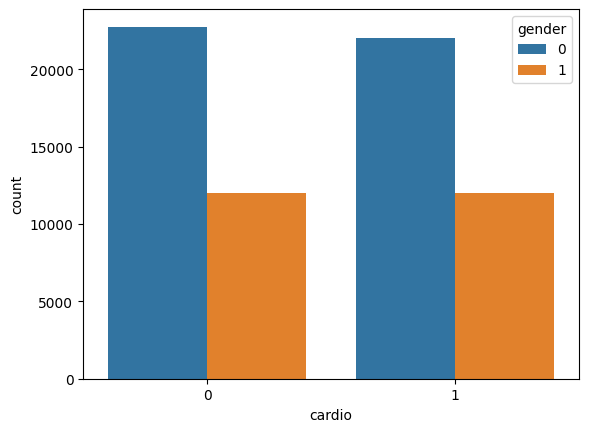

In [137]:
import seaborn as sns
sns.countplot(cardio,x='cardio',hue='gender')

<Axes: xlabel='height', ylabel='weight'>

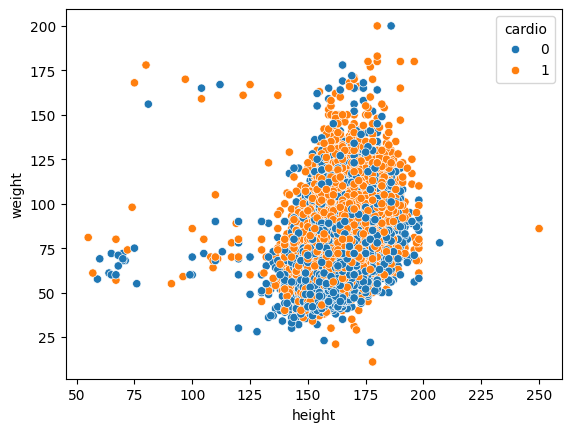

In [138]:
sns.scatterplot(data=cardio, x='height', y='weight', hue = 'cardio')

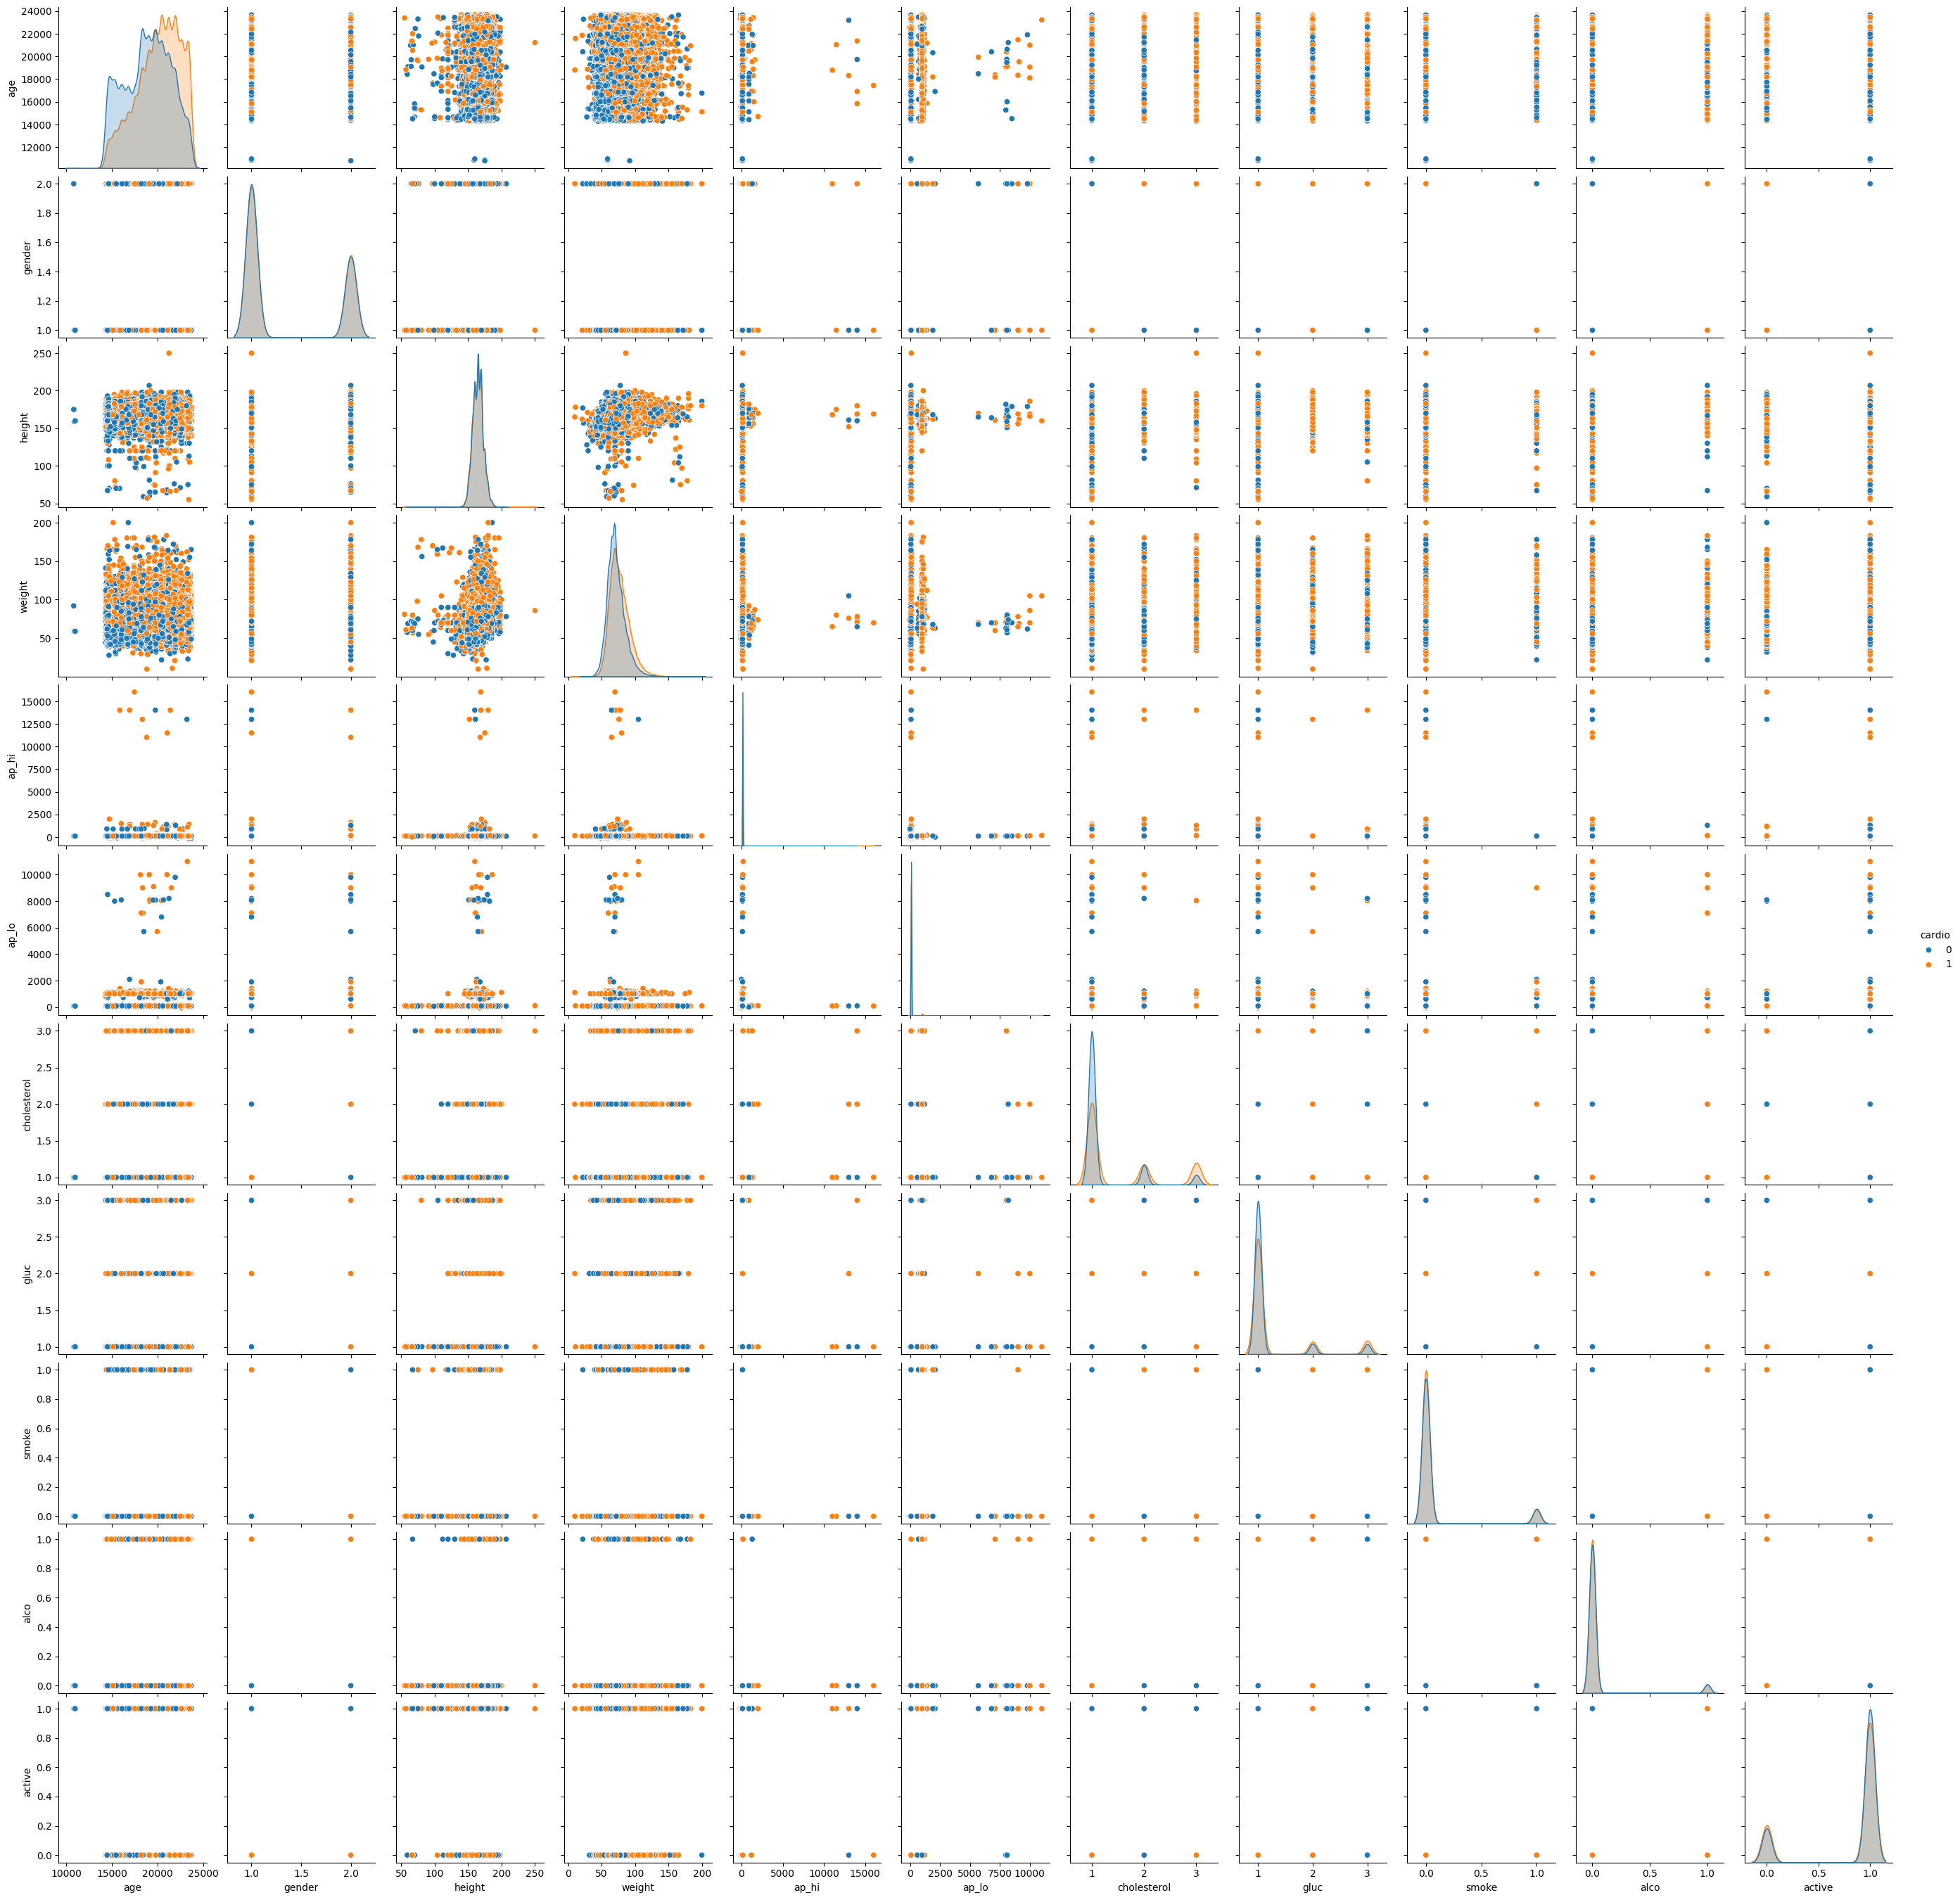

In [59]:
cardio_noid = cardio.drop(columns='id')
sns.pairplot(data=cardio_noid, hue = 'cardio')

<Axes: xlabel='age', ylabel='gender'>

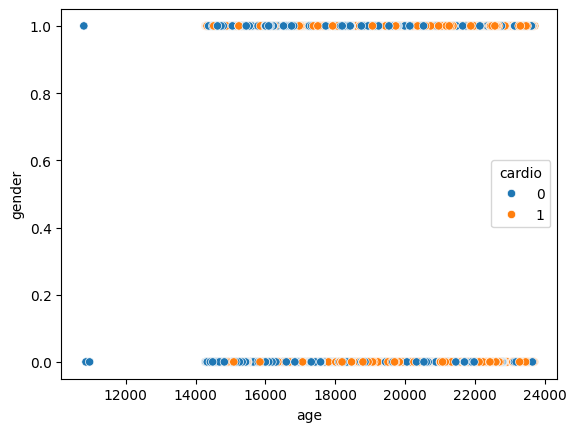

In [139]:
sns.scatterplot(data=cardio,x='age',y='gender', hue='cardio')

In [145]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
X = cardio.drop(columns=['id','cardio'])
y = cardio['cardio']
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y, random_state=42)
knn = KNeighborsClassifier(); lg = LogisticRegression()
knn.fit(x_train,y_train); lg.fit(x_train,y_train)
print(classification_report(y_test,knn.predict(x_test)))
print(classification_report(y_test,lg.predict(x_test)))

c:\Users\Playdata\AppData\Local\anaconda3\envs\pypandas\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.67      0.69      0.68      8686
           1       0.68      0.65      0.66      8505

    accuracy                           0.67     17191
   macro avg       0.67      0.67      0.67     17191
weighted avg       0.67      0.67      0.67     17191

              precision    recall  f1-score   support

           0       0.69      0.74      0.72      8686
           1       0.71      0.66      0.69      8505

    accuracy                           0.70     17191
   macro avg       0.70      0.70      0.70     17191
weighted avg       0.70      0.70      0.70     17191



In [146]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
cardio['bmi'] = round(cardio['weight'] / ((cardio['height']/100)**2),2)
X = cardio.drop(columns=['id','cardio','height','weight'])
y = cardio['cardio']
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y, random_state=42)
knn = KNeighborsClassifier(); lg = LogisticRegression()
knn.fit(x_train,y_train); lg.fit(x_train,y_train)
print(classification_report(y_test,knn.predict(x_test)))
print(classification_report(y_test,lg.predict(x_test)))

c:\Users\Playdata\AppData\Local\anaconda3\envs\pypandas\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.68      0.70      0.69      8686
           1       0.68      0.66      0.67      8505

    accuracy                           0.68     17191
   macro avg       0.68      0.68      0.68     17191
weighted avg       0.68      0.68      0.68     17191

              precision    recall  f1-score   support

           0       0.63      0.70      0.66      8686
           1       0.65      0.57      0.61      8505

    accuracy                           0.64     17191
   macro avg       0.64      0.64      0.63     17191
weighted avg       0.64      0.64      0.63     17191



In [150]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
cardio['bmi'] = round(cardio['weight'] / ((cardio['height']/100)**2),2)
X = cardio.drop(columns=['id','cardio','height','weight'])
X['age'] = X['age']/365
y = cardio['cardio']
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y, random_state=42)
knn = KNeighborsClassifier(); lg = LogisticRegression()
knn.fit(x_train,y_train); lg.fit(x_train,y_train)
print(classification_report(y_test,knn.predict(x_test)))
print(classification_report(y_test,lg.predict(x_test)))

c:\Users\Playdata\AppData\Local\anaconda3\envs\pypandas\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.69      0.71      0.70      8686
           1       0.70      0.68      0.69      8505

    accuracy                           0.69     17191
   macro avg       0.69      0.69      0.69     17191
weighted avg       0.69      0.69      0.69     17191

              precision    recall  f1-score   support

           0       0.68      0.73      0.70      8686
           1       0.70      0.65      0.68      8505

    accuracy                           0.69     17191
   macro avg       0.69      0.69      0.69     17191
weighted avg       0.69      0.69      0.69     17191



In [149]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
cardio['bmi'] = round(cardio['weight'] / ((cardio['height']/100)**2),2)
X = cardio.drop(columns=['id','cardio','height','weight','gender'])
X['age'] = X['age']/365
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
y = cardio['cardio']
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y, random_state=42)
knn = KNeighborsClassifier(); lg = LogisticRegression()
knn.fit(x_train,y_train); lg.fit(x_train,y_train)
print(classification_report(y_test,knn.predict(x_test)))
print(classification_report(y_test,lg.predict(x_test)))

c:\Users\Playdata\AppData\Local\anaconda3\envs\pypandas\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.69      0.71      0.70      8686
           1       0.69      0.67      0.68      8505

    accuracy                           0.69     17191
   macro avg       0.69      0.69      0.69     17191
weighted avg       0.69      0.69      0.69     17191

              precision    recall  f1-score   support

           0       0.69      0.72      0.70      8686
           1       0.70      0.66      0.68      8505

    accuracy                           0.69     17191
   macro avg       0.69      0.69      0.69     17191
weighted avg       0.69      0.69      0.69     17191



In [ ]:
# https://www.kaggle.com/code/mailsmsi/cardiovascular-disease-machine-learning-eda
# https://www.kaggle.com/code/manarmohamed24/cardiovascular-disease

KNN Accuracy: 0.65
Logistic Regression Accuracy: 0.71


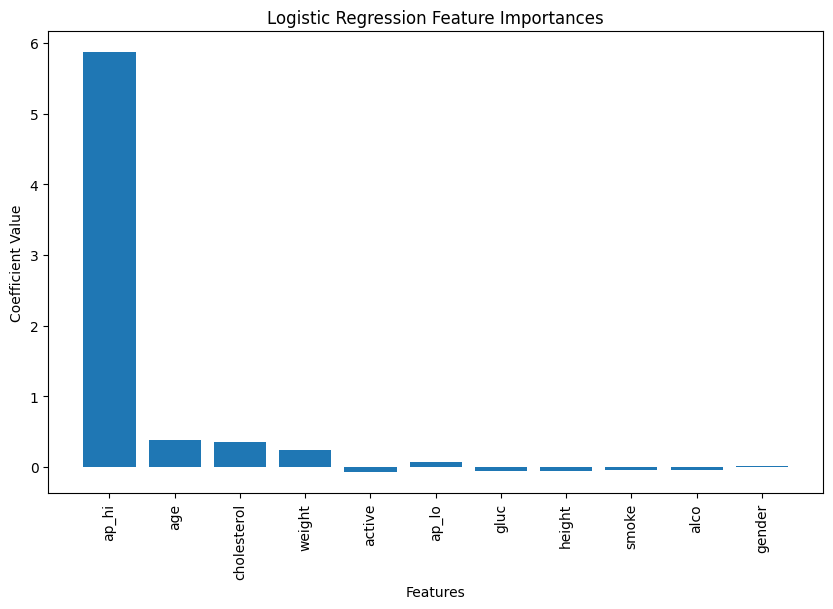

In [151]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# 데이터 로드
data = pd.read_csv('cardio_train.csv', sep=';')

# 데이터 전처리
data.drop('id', axis=1, inplace=True)
X = data.drop('cardio', axis=1)
y = data['cardio']

# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 특성 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN 모델 학습 및 평가
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_accuracy = knn_model.score(X_test_scaled, y_test)
print(f'KNN Accuracy: {knn_accuracy:.2f}')

# 로지스틱 회귀 모델 학습 및 평가
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train_scaled, y_train)
logreg_accuracy = logreg_model.score(X_test_scaled, y_test)
print(f'Logistic Regression Accuracy: {logreg_accuracy:.2f}')

# 로지스틱 회귀 Feature Importance 시각화 (회귀 계수 사용)
coefficients = logreg_model.coef_[0]
indices = np.argsort(np.abs(coefficients))[::-1]

plt.figure(figsize=(10, 6))
plt.title("Logistic Regression Feature Importances")
plt.bar(range(X.shape[1]), coefficients[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.show()

In [152]:
# 로그 함수를 씌워 치우친 데이터 정규화 가능

In [154]:
# 다이아몬드 등급 예측 모델 (두개 모델 성능 비교)
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [155]:
df['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [159]:
df['color'].unique()

['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

In [158]:
df[df['cut']=='Fair']['color'].unique()

['E', 'F', 'H', 'G', 'J', 'I', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

In [162]:
df['clarity'].unique()

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

In [169]:
df[df['cut']=='Ideal']['clarity'].unique()

['SI2', 'VS1', 'SI1', 'VVS2', 'VVS1', 'VS2', 'IF', 'I1']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

In [156]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [171]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
X = df.drop(columns=['carat','color','price','cut','clarity'])
y = df['cut']
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)
knn = KNeighborsClassifier(); lg = LogisticRegression()
knn.fit(x_train,y_train); lg.fit(x_train, y_train)
print(classification_report(y_test,knn.predict(x_test)))
print(classification_report(y_test,lg.predict(x_test)))

c:\Users\Playdata\AppData\Local\anaconda3\envs\pypandas\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

        Fair       0.86      0.81      0.83       402
        Good       0.66      0.63      0.65      1226
       Ideal       0.79      0.90      0.85      5388
     Premium       0.67      0.74      0.71      3448
   Very Good       0.58      0.38      0.46      3021

    accuracy                           0.72     13485
   macro avg       0.71      0.69      0.70     13485
weighted avg       0.71      0.72      0.71     13485

              precision    recall  f1-score   support

        Fair       0.00      0.00      0.00       402
        Good       0.00      0.00      0.00      1226
       Ideal       0.56      0.94      0.70      5388
     Premium       0.51      0.65      0.57      3448
   Very Good       0.42      0.01      0.02      3021

    accuracy                           0.54     13485
   macro avg       0.30      0.32      0.26     13485
weighted avg       0.45      0.54      0.43     13485



c:\Users\Playdata\AppData\Local\anaconda3\envs\pypandas\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Playdata\AppData\Local\anaconda3\envs\pypandas\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Playdata\AppData\Local\anaconda3\envs\pypandas\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [172]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
oe = OrdinalEncoder() # 순서
le = LabelEncoder()
df['color'] = oe.fit_transform(df['color'])
df['clarity'] = oe.fit_transform(df['clarity'])
X = df.drop(columns='cut')
y = df['cut']

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.